In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
proj_path = '/data100t1/home/wanying/CCHC/proteomics/20241014_data_cleaning/output'
id_mapping_fn = f'{proj_path}/olink_uniprot_assay_id_mapping.csv'
df_id_mapping= pd.read_csv(id_mapping_fn)
display(df_id_mapping.head(2))

protein_fn = f'{proj_path}/20240919_CCHC_proteomics.batch2.OlinkID.NPX.csv'
df_protein = pd.read_csv(protein_fn)
display(df_protein.head(2))

pheno_fn = '/data100t1/share/CCHC/phenotypes/0724/cchc_phenotypes_0724.txt'
cols = ['RRID', 'LABID', 'AGE_AT_VISIT', 'GENDER']
df_pheno = pd.read_csv(pheno_fn, sep='|', dtype=str)[cols]
for col in ['AGE_AT_VISIT', 'GENDER']:
    df_pheno[col] = pd.to_numeric(df_pheno[col], errors='coerce')
display(df_pheno.head(2))

# Merge phenotype with df_protein
df_protein_merge = df_pheno.merge(df_protein, on='LABID')
display(df_protein_merge.head(2))

,OlinkID,UniProt,Assay
0,OID45511,EXT1,Extension control 1
1,OID45519,INC1,Incubation control 1


,LABID,OID45511,OID45519,OID45503,OID40001,OID40002,OID40003,OID40004,OID40005,OID40006,...,OID45493,OID45494,OID45495,OID45496,OID45497,OID45498,OID45499,OID45500,OID45501,OID45502
0,10Y0001,0.0,0.098128,0.009231,1.719527,1.415027,-0.662254,1.242358,-0.145884,-4.228008,...,-0.187204,-0.333129,-0.048588,0.351591,0.072964,0.038539,0.112379,-0.363623,-0.330237,-0.060775
1,10Y0005,0.0,0.084841,0.118812,1.020391,1.059447,-0.461474,-0.099768,-0.672721,2.240973,...,0.214983,0.129681,0.060721,0.019057,0.313470,0.118445,0.091292,0.262861,-0.013622,-0.174585


,RRID,LABID,AGE_AT_VISIT,GENDER
0,BD0001,BD4001,40.0,2.0
1,BD0001,5Y0002,30.4,2.0


,RRID,LABID,AGE_AT_VISIT,GENDER,OID45511,OID45519,OID45503,OID40001,OID40002,OID40003,...,OID45493,OID45494,OID45495,OID45496,OID45497,OID45498,OID45499,OID45500,OID45501,OID45502
0,BD0005,15Y0055,51.1,1.0,0.0,0.078425,0.058952,1.095446,0.196774,4.525359,...,0.002698,0.082991,0.430357,0.036555,0.015324,0.228875,0.512836,0.211335,0.814661,-0.522716
1,BD0009,15Y0224,61.2,1.0,0.0,-0.047388,0.016086,3.353032,1.195139,6.889091,...,-0.197254,-0.164190,-0.001129,-0.054188,0.064943,0.147697,0.199649,0.220925,0.343605,0.068846


In [42]:
proteins = ['PZP', 'EDDM3B', 'TSPY3_TSPY10']
mask = df_id_mapping['Assay']==proteins[0]
if len(proteins) > 1:
    for protein in proteins:
        mask = mask | (df_id_mapping['Assay']==protein)
    
display(df_id_mapping[mask])
dict_proteins_to_plot = df_id_mapping[mask][['OlinkID',
                                             'Assay']].set_index(keys='OlinkID').to_dict()['Assay']

,OlinkID,UniProt,Assay
1948,OID41966,P0CV98_P0CW01,TSPY3_TSPY10
3610,OID43651,P56851,EDDM3B
5427,OID45485,P20742,PZP


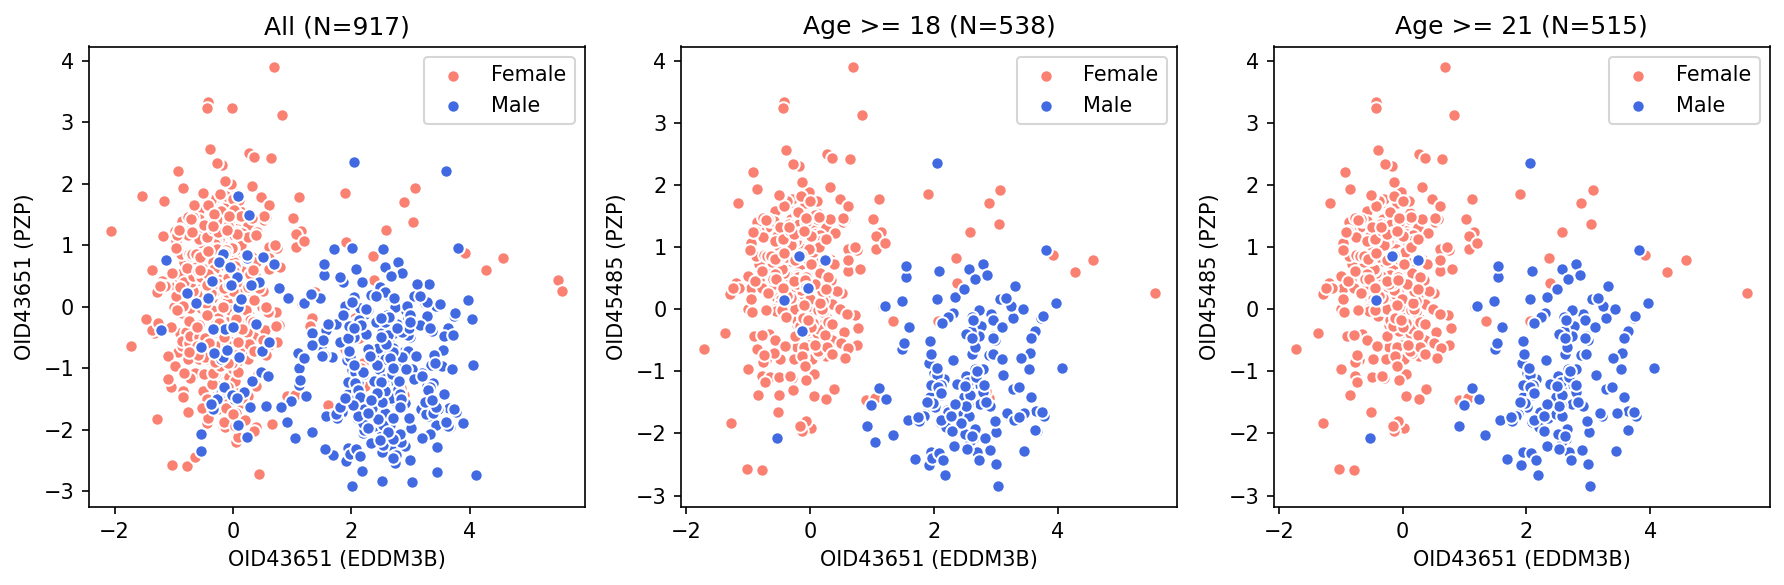

In [44]:
n_samples = len(df_protein_merge)
fig, ax = plt.subplots(figsize=(12, 4), ncols=3, dpi=150)
mask_male = df_protein_merge['GENDER']==1
mask_female = df_protein_merge['GENDER']==2

x_olink_id, y_olink_id = 'OID43651', 'OID45485'
ax[0].scatter(df_protein_merge[mask_female][x_olink_id],
              df_protein_merge[mask_female][y_olink_id],
              color='salmon', edgecolor='w', label='Female')

ax[0].scatter(df_protein_merge[mask_male][x_olink_id],
              df_protein_merge[mask_male][y_olink_id],
              color='royalblue', edgecolor='w', label='Male')
ax[0].legend()
ax[0].set_xlabel(f'{x_olink_id} ({dict_proteins_to_plot[x_olink_id]})')
ax[0].set_ylabel(f'{x_olink_id} ({dict_proteins_to_plot[y_olink_id]})')
ax[0].set_title(f'All (N={n_samples})')


age_threshold = 18
mask_age = df_protein_merge['AGE_AT_VISIT']>=age_threshold
n_samples = len(df_protein_merge[mask_age])
ax[1].scatter(df_protein_merge[mask_female&mask_age][x_olink_id],
              df_protein_merge[mask_female&mask_age][y_olink_id],
              color='salmon', edgecolor='w', label='Female')

ax[1].scatter(df_protein_merge[mask_male&mask_age][x_olink_id],
              df_protein_merge[mask_male&mask_age][y_olink_id],
              color='royalblue', edgecolor='w', label='Male')
ax[1].legend()
ax[1].set_xlabel(f'{x_olink_id} ({dict_proteins_to_plot[x_olink_id]})')
ax[1].set_ylabel(f'{y_olink_id} ({dict_proteins_to_plot[y_olink_id]})')
ax[1].set_title(f'Age >= {age_threshold} (N={n_samples})')

age_threshold = 21
mask_age = df_protein_merge['AGE_AT_VISIT']>=age_threshold
n_samples = len(df_protein_merge[mask_age])
ax[2].scatter(df_protein_merge[mask_female&mask_age][x_olink_id],
              df_protein_merge[mask_female&mask_age][y_olink_id],
              color='salmon', edgecolor='w', label='Female')

ax[2].scatter(df_protein_merge[mask_male&mask_age][x_olink_id],
              df_protein_merge[mask_male&mask_age][y_olink_id],
              color='royalblue', edgecolor='w', label='Male')
ax[2].legend()

ax[2].set_xlabel(f'{x_olink_id} ({dict_proteins_to_plot[x_olink_id]})')
ax[2].set_ylabel(f'{y_olink_id} ({dict_proteins_to_plot[y_olink_id]})')
ax[2].set_title(f'Age >= {age_threshold} (N={n_samples})')
fig.tight_layout()
# df_protein_merge

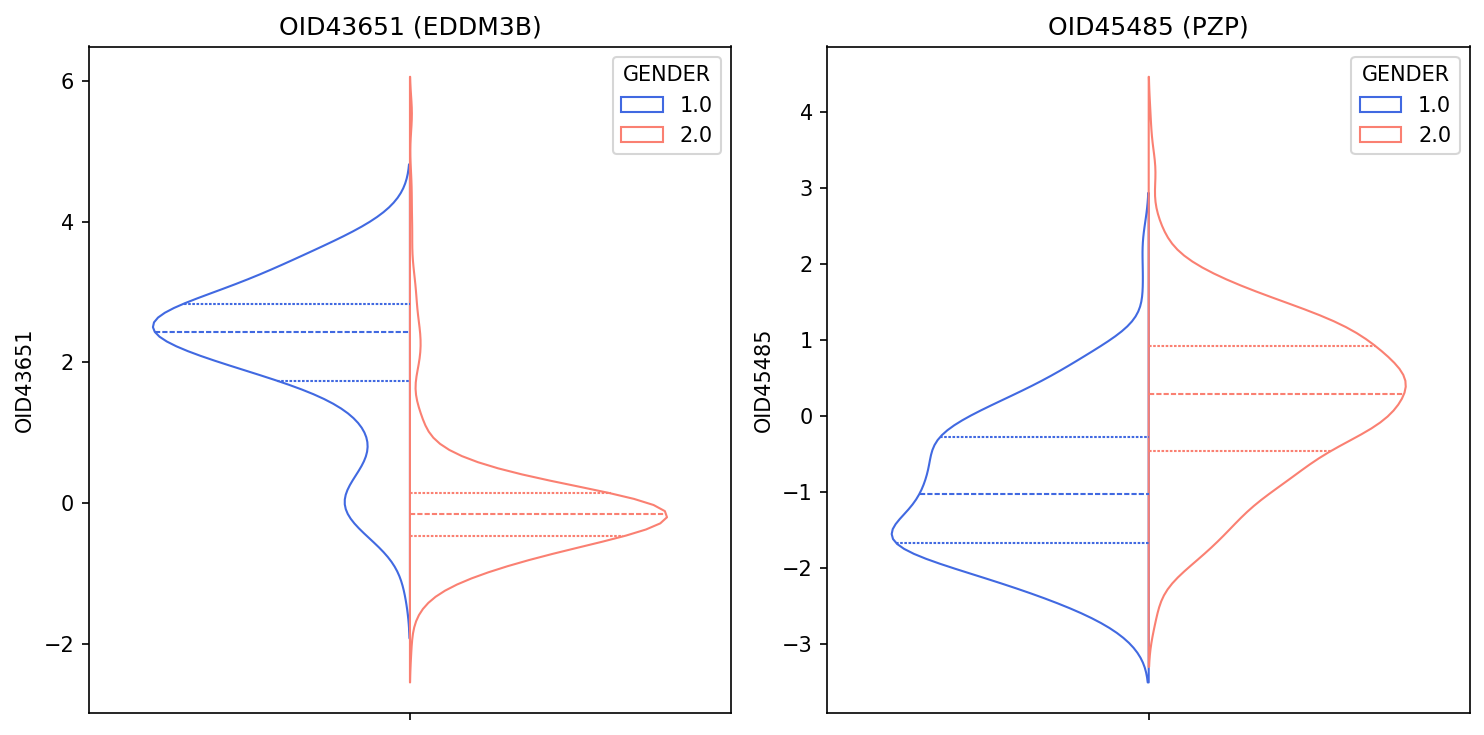

In [41]:
# Plot
fig, ax = plt.subplots(figsize=(10,5), ncols=2, dpi=150)
# x_olink_id, y_olink_id = 'OID43651', 'OID45485'
# sns.violinplot(data=df_protein_merge, x='Assay', y=x_olink_id, hue='Gender',
#                split=True, fill=False, inner='quart', ax=ax[i], linewidth=1)
dict_color = {1:'royalblue', 2:'salmon'}
sns.violinplot(data=df_protein_merge, y=x_olink_id, hue='GENDER', split=True,
               fill=False, inner='quart', ax=ax[0], linewidth=1, palette=dict_color)
ax[0].set_title(f'{x_olink_id} ({dict_proteins_to_plot[x_olink_id]})')

sns.violinplot(data=df_protein_merge, y=y_olink_id, hue='GENDER', split=True,
               fill=False, inner='quart', ax=ax[1], linewidth=1, palette=dict_color)
ax[1].set_title(f'{y_olink_id} ({dict_proteins_to_plot[y_olink_id]})')
fig.tight_layout()